In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\krishna\\AppData\\Local\\Temp\\Temp1_185987_416528_bundle_archive.zip\\diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
del df['Pregnancies']

In [4]:
dff=pd.DataFrame(data=df,columns=['Age','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Outcome'])
dff.head()

,Age,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome
0,50,148,72,35,33.6,0.627,1
1,31,85,66,29,26.6,0.351,0
2,32,183,64,0,23.3,0.672,1
3,21,89,66,23,28.1,0.167,0
4,33,137,40,35,43.1,2.288,1


In [5]:
x=dff.iloc[:,:-1].values

In [6]:
y=dff.iloc[:,-1].values

C:\Users\krishna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\krishna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


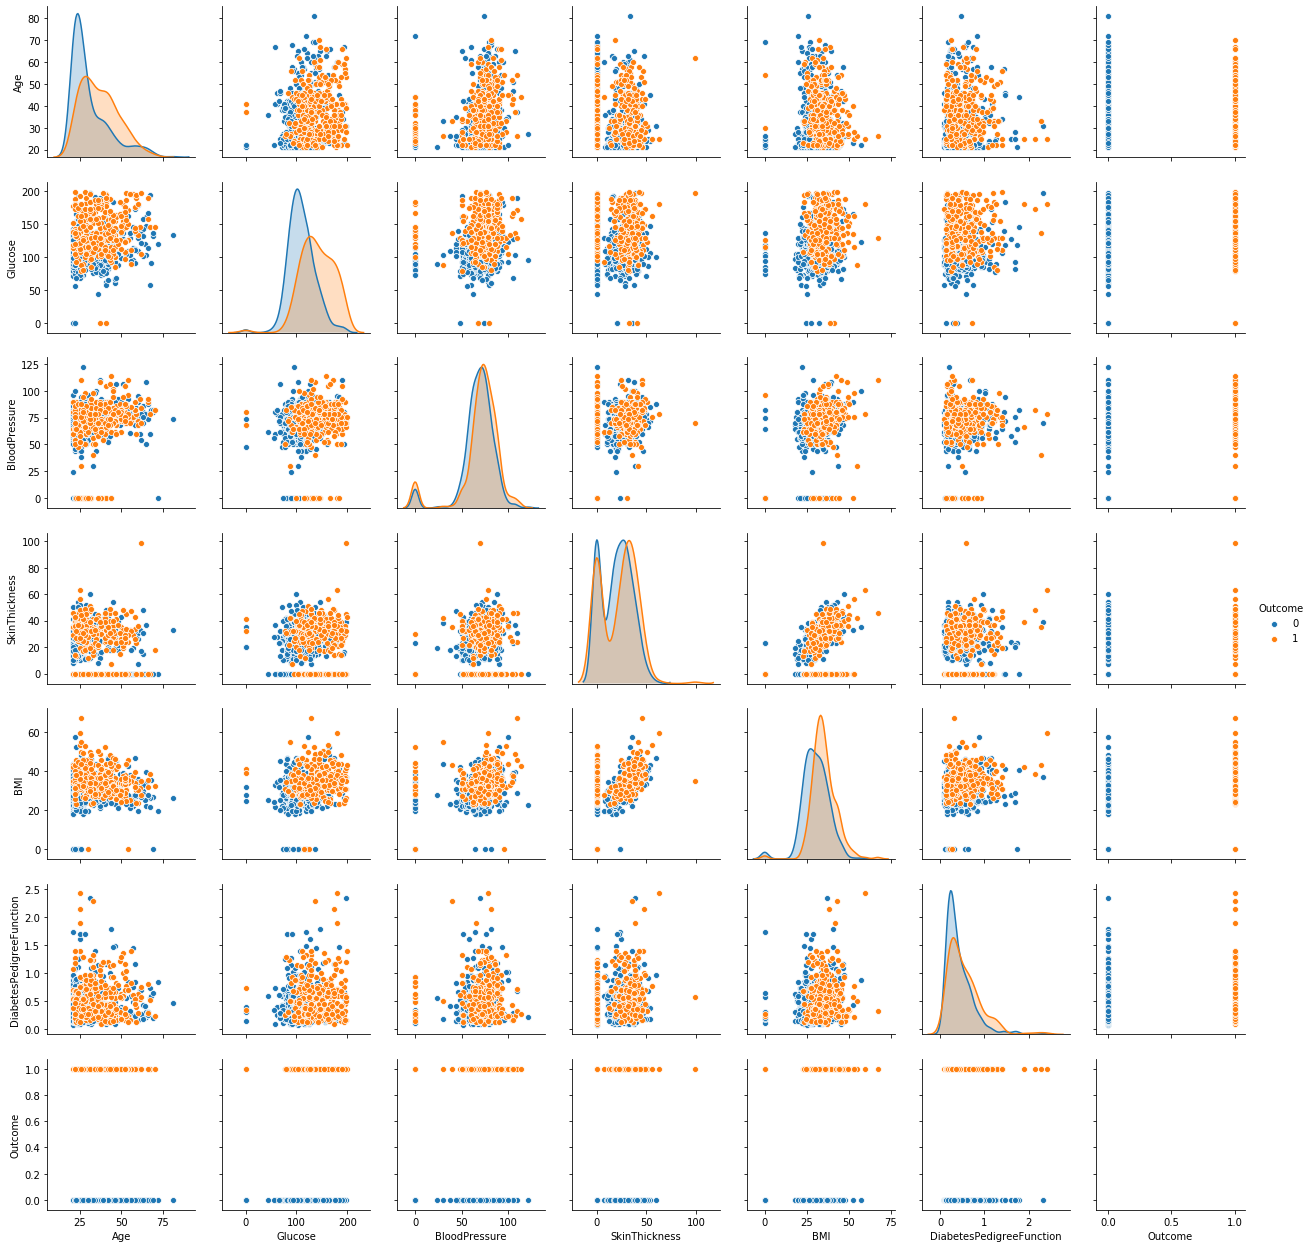

In [7]:
sns.pairplot(data=dff,hue='Outcome')

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
new=lr.predict([[42,130,80,20,27.5,0.421]])
new

array([0], dtype=int64)

In [12]:
from sklearn.metrics import *

In [13]:
cf=confusion_matrix(y_test,pred)
cf

array([[116,  14],
       [ 28,  34]], dtype=int64)

In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.71      0.55      0.62        62

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [15]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
predn=nb.predict(x_test)

In [16]:
predn

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
newn=nb.predict([[42,130,80,20,27.5,0.421]])
newn

array([0], dtype=int64)

In [18]:
cf=confusion_matrix(y_test,predn)
cf

array([[113,  17],
       [ 28,  34]], dtype=int64)

In [19]:
print(classification_report(y_test,predn))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.67      0.55      0.60        62

    accuracy                           0.77       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt=dt.predict(x_test)

In [21]:
predt

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [22]:
cf=confusion_matrix(y_test,predt)
cf

array([[104,  26],
       [ 24,  38]], dtype=int64)

In [23]:
print(classification_report(y_test,predt))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       130
           1       0.59      0.61      0.60        62

    accuracy                           0.74       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.74      0.74       192



In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1_train=ss.fit_transform(x_train)
x1_test=ss.transform(x_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [26]:
for k in range(1,11):
    knn=KNeighborsClassifier(k)
    knn.fit(x1_train,y_train)
    predk=knn.predict(x1_test)
    accuracy=accuracy_score(y_test,predk)
    print('accuracy of k=',k,'is',accuracy)

accuracy of k= 1 is 0.6927083333333334
accuracy of k= 2 is 0.734375
accuracy of k= 3 is 0.765625
accuracy of k= 4 is 0.78125
accuracy of k= 5 is 0.7864583333333334
accuracy of k= 6 is 0.7760416666666666
accuracy of k= 7 is 0.7708333333333334
accuracy of k= 8 is 0.7708333333333334
accuracy of k= 9 is 0.7916666666666666
accuracy of k= 10 is 0.7760416666666666


In [27]:
knn=KNeighborsClassifier(3)
knn.fit(x1_train,y_train)
predk1=knn.predict(x1_test)
predk1

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [28]:
cf=confusion_matrix(y_test,predk1)
cf

array([[107,  23],
       [ 22,  40]], dtype=int64)

In [29]:
print(classification_report(y_test,predk1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       130
           1       0.63      0.65      0.64        62

    accuracy                           0.77       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.77      0.77      0.77       192



In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predg=gbc.predict(x_test)
predg

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
cf=confusion_matrix(y_test,predg)
cf

array([[115,  15],
       [ 22,  40]], dtype=int64)

In [32]:
print(classification_report(y_test,predg))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.73      0.65      0.68        62

    accuracy                           0.81       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



In [35]:
from sklearn.ensemble import XGBClassifier
XG=XGBClassifier()
XG.fit(x_train,y_train)
predx=XG.predict(x_test)
predx

ImportError: cannot import name 'XGBClassifier' from 'sklearn.ensemble' (C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)